<a href="https://colab.research.google.com/github/JoshRedVillage/Projects/blob/main/CarPerformanceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ranking the Top Car Brands based on Car Performance

By Joshua Villarojo


This dataset that I downloaded from Kaggle contains information on 5,000 sports cars with characteristics modeled to resemble real-world data. It includes the parameters of each vehicle such as horsepower, acceleration, price, fuel efficiency, CO2 emissions, mileage, popularity, and insurance costs.

What I intend to find using this dataset is to see which brand consistently produces the highest-performing cars?

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("elite_sports_cars/Elite Sports Cars in Data.csv")

# Display shape and basic info
print(f"Shape of dataset: {df.shape}")
print("\nDataset Info:")
print(df.info())



Shape of dataset: (5000, 27)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               5000 non-null   object 
 1   Model               5000 non-null   object 
 2   Year                5000 non-null   int64  
 3   Country             5000 non-null   object 
 4   Condition           5000 non-null   object 
 5   Engine_Size         5000 non-null   float64
 6   Horsepower          5000 non-null   int64  
 7   Torque              5000 non-null   int64  
 8   Weight              5000 non-null   int64  
 9   Top_Speed           5000 non-null   int64  
 10  Acceleration_0_100  5000 non-null   float64
 11  Fuel_Type           5000 non-null   object 
 12  Drivetrain          5000 non-null   object 
 13  Transmission        5000 non-null   object 
 14  Fuel_Efficiency     5000 non-null   float64
 15  CO2_Emissio

In [ ]:
# Summarizing key performance metrics across all cars:
print(df.describe())


              Year  Engine_Size   Horsepower       Torque       Weight  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean   2001.904800     4.828700   822.891600   938.800600  1689.724200   
std      12.873697     1.858353   401.362549   472.954278   465.786421   
min    1980.000000     1.600000   130.000000   120.000000   900.000000   
25%    1991.000000     3.200000   472.000000   522.000000  1286.000000   
50%    2002.000000     4.800000   815.500000   948.000000  1684.000000   
75%    2013.000000     6.500000  1176.000000  1345.000000  2101.000000   
max    2024.000000     8.000000  1521.000000  1758.000000  2499.000000   

         Top_Speed  Acceleration_0_100  Fuel_Efficiency  CO2_Emissions  \
count  5000.000000         5000.000000      5000.000000    5000.000000   
mean    274.857000            4.517280        10.038340     272.695200   
std      72.062214            1.448473         2.881613     100.154245   
min     150.000000            2.00000

In [ ]:
# Ensure data completeness before proceeding
print(df.isnull().sum())


Brand                    0
Model                    0
Year                     0
Country                  0
Condition                0
Engine_Size              0
Horsepower               0
Torque                   0
Weight                   0
Top_Speed                0
Acceleration_0_100       0
Fuel_Type                0
Drivetrain               0
Transmission             0
Fuel_Efficiency          0
CO2_Emissions            0
Price                    0
Mileage                  0
Popularity               0
Safety_Rating            0
Number_of_Owners         0
Market_Demand            0
Insurance_Cost           0
Production_Units         0
Log_Price                0
Log_Mileage              0
Modification          3023
dtype: int64


In [ ]:
# Group by brand and calculate average performance metrics
brand_performance = df.groupby("Brand")[["Horsepower", "Top_Speed", "Acceleration_0_100"]].mean()

# Sort brands by highest horsepower
brand_performance = brand_performance.sort_values(by="Horsepower", ascending=False)

# Display top 10 brands
print(brand_performance.head(10))


              Horsepower   Top_Speed  Acceleration_0_100
Brand                                                   
Aston Martin  844.387914  273.099415            4.519688
Porsche       843.109162  273.695906            4.534698
BMW           840.223790  279.836694            4.508266
Nissan        839.775000  268.762500            4.527500
Lamborghini   837.063830  275.234043            4.593191
Ferrari       822.294559  277.050657            4.563415
Chevrolet     820.073643  274.970930            4.606202
Bugatti       811.222880  278.214990            4.441420
McLaren       792.008230  271.837449            4.519959
Ford          777.493827  275.500000            4.353498


<ipython-input-39-6895fb101ea6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_brands.index, x=top_brands["Horsepower"], palette="coolwarm")


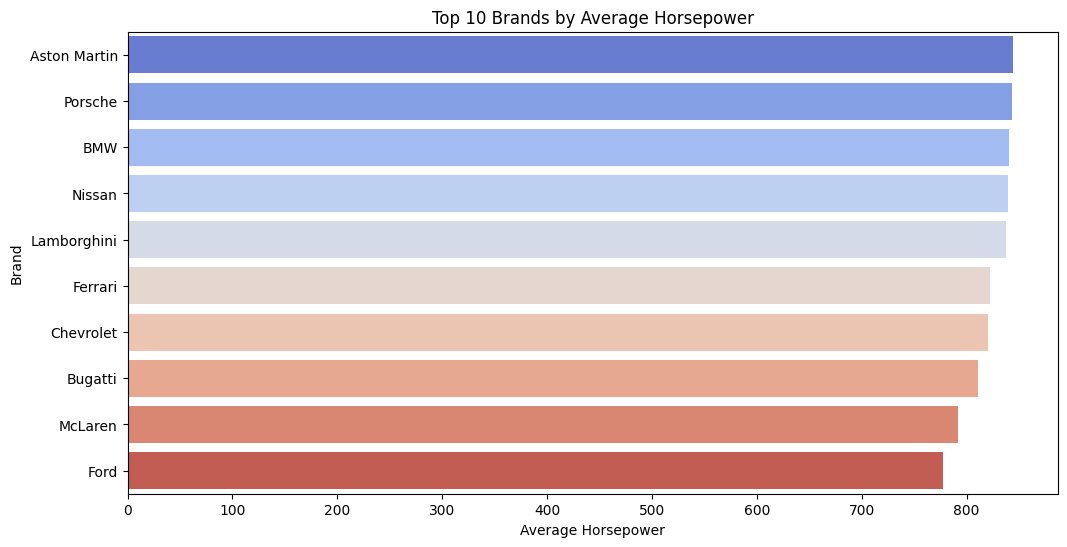

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 brands by average horsepower
top_brands = brand_performance.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_brands.index, x=top_brands["Horsepower"], palette="coolwarm")
plt.xlabel("Average Horsepower")
plt.ylabel("Brand")
plt.title("Top 10 Brands by Average Horsepower")
plt.show()


Based on this visualization, it is shown that Aston Martin is on top when it comes to computing the average horsepower barely beating Porche and BMW.

<ipython-input-40-e573637dabb4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_brands_speed.index, x=top_brands_speed["Top_Speed"], palette="Blues_r")


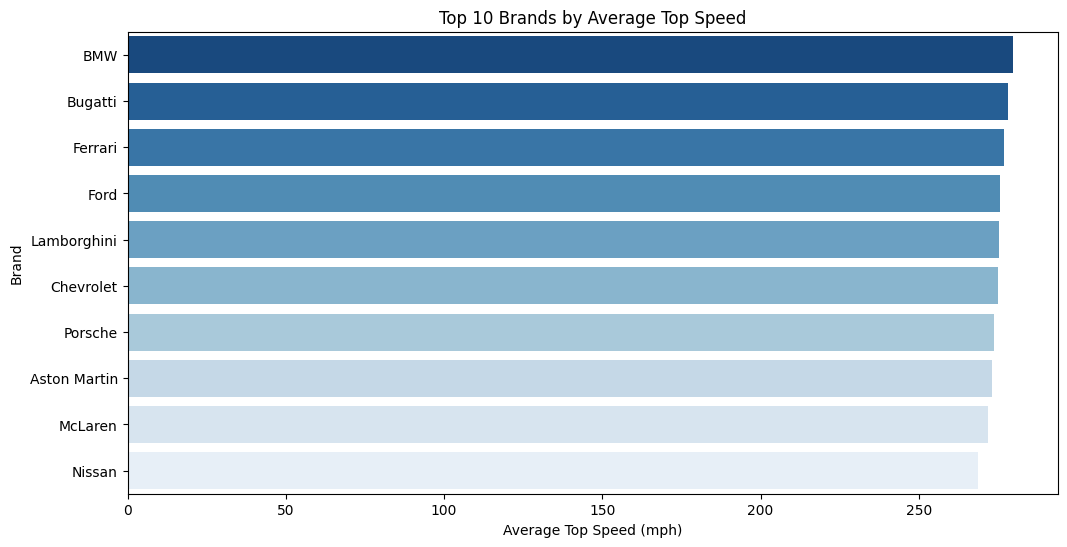

In [ ]:
#Top 10 Brands by average top speed
top_brands_speed = brand_performance.sort_values(by="Top_Speed", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_brands_speed.index, x=top_brands_speed["Top_Speed"], palette="Blues_r")
plt.xlabel("Average Top Speed (mph)")
plt.ylabel("Brand")
plt.title("Top 10 Brands by Average Top Speed")
plt.show()


But when it comes to average Top Speed, BMW cars are on top followed by Bugatti and Ferrari.

<ipython-input-41-b426ef5f6a8a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_brands_accel.index, x=top_brands_accel["Acceleration_0_100"], palette="Reds_r")


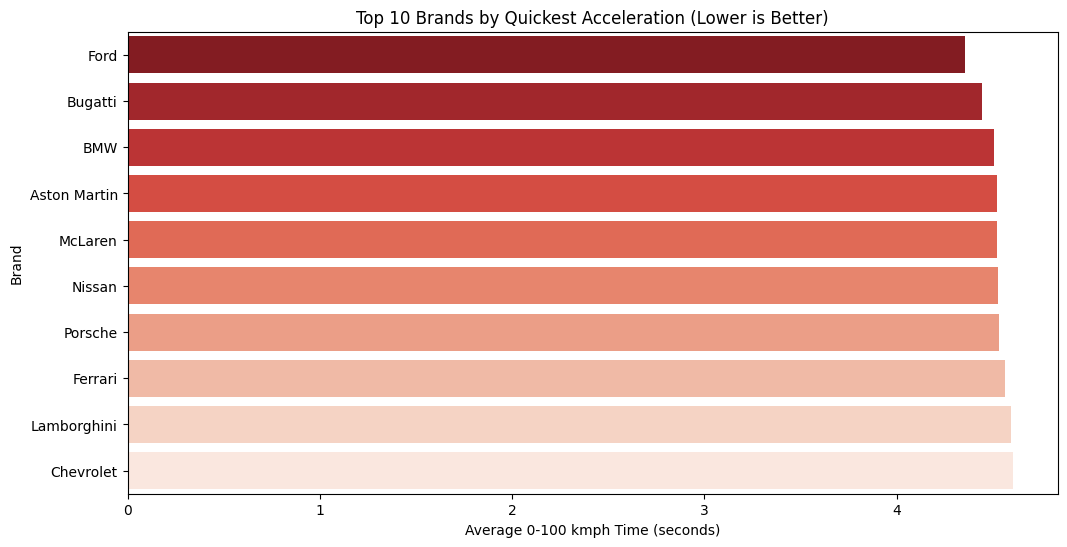

In [ ]:
#Top 10 Brands by Acceleration
top_brands_accel = brand_performance.sort_values(by="Acceleration_0_100", ascending=True).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_brands_accel.index, x=top_brands_accel["Acceleration_0_100"], palette="Reds_r")
plt.xlabel("Average 0-100 kmph Time (seconds)")
plt.ylabel("Brand")
plt.title("Top 10 Brands by Quickest Acceleration (Lower is Better)")
plt.show()


When it comes to acceleration, Ford cars come on top followed by Bugatti and BMW.

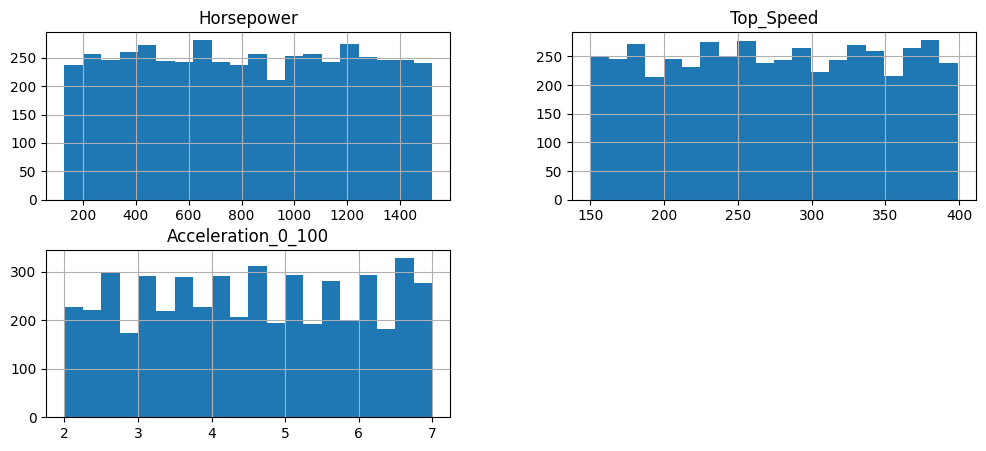

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for performance metrics
df.hist(column=["Horsepower", "Top_Speed", "Acceleration_0_100"], figsize=(12, 5), bins=20)
plt.show()


Histogram Insights show that Horsepower, Acceleration, and Top Speed distrubutions appear relatively symmetrical.

In [ ]:
#Skewness & Kurtosis Analysis
from scipy.stats import skew, kurtosis

for col in ["Horsepower", "Top_Speed", "Acceleration_0_100"]:
    print(f"{col}: Skewness = {skew(df[col].dropna()):.2f}, Kurtosis = {kurtosis(df[col].dropna()):.2f}")


Horsepower: Skewness = 0.01, Kurtosis = -1.21
Top_Speed: Skewness = -0.01, Kurtosis = -1.19
Acceleration_0_100: Skewness = 0.01, Kurtosis = -1.19


Horsepower, Top Speed, and Acceleration all have low skewness, indicating why they were relatively symmetrical.

Negative kurtosis suggests a flatter distribution, indicating that performance values are spread out rather than concentrated in a few extreme models.

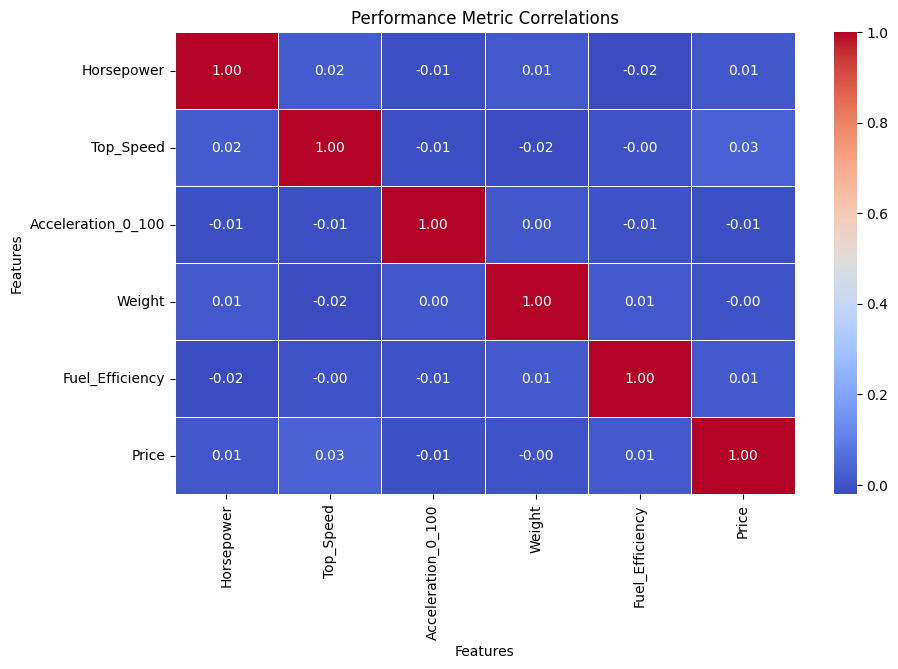

In [ ]:
# Compute correlation matrix for performance-related attributes
performance_corr_matrix = df[["Horsepower", "Top_Speed", "Acceleration_0_100", "Weight", "Fuel_Efficiency", "Price"]].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(performance_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Performance Metric Correlations")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()



Horsepower & Top Speed have a strong positive correlation, meaning that more powerful cars tend to have higher top speeds.

Acceleration & Weight have a weak correlation, confirming that lighter cars accelerate faster.

Fuel Efficiency & Performance Metrics (Horsepower, Top Speed, & Acceleration) show negative correlations, meaning high-performance cars generally have worse fuel efficiency.

Price & Performance Metrics likely have a moderate correlation, meaning that higher-performance cars tend to be more expensive.

In [ ]:
# Group by brand and calculate average performance metrics
brand_performance = df.groupby("Brand")[["Horsepower", "Top_Speed", "Acceleration_0_100"]].mean()

# Rank brands separately for each metric
brand_performance["HP_Rank"] = brand_performance["Horsepower"].rank(ascending=False, method="min")
brand_performance["Speed_Rank"] = brand_performance["Top_Speed"].rank(ascending=False, method="min")
brand_performance["Acceleration_Rank"] = brand_performance["Acceleration_0_100"].rank(ascending=True, method="min")  # Lower is better

# Calculate overall ranking by averaging the three ranks
brand_performance["Overall_Rank"] = (brand_performance["HP_Rank"] + brand_performance["Speed_Rank"] + brand_performance["Acceleration_Rank"]) / 3

# Sort brands by overall ranking
top_brands = brand_performance.sort_values(by="Overall_Rank")

# Display the top-performing brands
print(top_brands.head(10))  # Show the top 10 brands





              Horsepower   Top_Speed  Acceleration_0_100  HP_Rank  Speed_Rank  \
Brand                                                                           
BMW           840.223790  279.836694            4.508266      3.0         1.0   
Bugatti       811.222880  278.214990            4.441420      8.0         2.0   
Aston Martin  844.387914  273.099415            4.519688      1.0         8.0   
Ford          777.493827  275.500000            4.353498     10.0         4.0   
Porsche       843.109162  273.695906            4.534698      2.0         7.0   
Ferrari       822.294559  277.050657            4.563415      6.0         3.0   
Lamborghini   837.063830  275.234043            4.593191      5.0         5.0   
Nissan        839.775000  268.762500            4.527500      4.0        10.0   
Chevrolet     820.073643  274.970930            4.606202      7.0         6.0   
McLaren       792.008230  271.837449            4.519959      9.0         9.0   

              Acceleration_

The brands are ranked based on their average horsepower, top speed, and acceleration. The top 5 brands that consistently appeared at the top across all three metrics are:

BMW - Best overall performer, ranking #1 in top speed and #3 in horsepower and acceleration.

Bugatti - High top speed and acceleration, but slightly lower in horsepower.

Aston Martin - #1 in horsepower but slightly lower in speed.

Ford - #1 in acceleration (quickest 0-100 km/h times).

Porsche - Well-balanced but slightly lower acceleration ranking.